In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

# Set up environment
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Disable debugging logs


# Load the dataset

In [4]:

Image_Size = 224
Batch_Size = 32
Channels = 3
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/LEAF_Project/Dataset",
    batch_size=Batch_Size,
    image_size=(Image_Size, Image_Size),
    shuffle=True
)
class_name = dataset.class_names

Found 224 files belonging to 3 classes.


# Plotting sample images

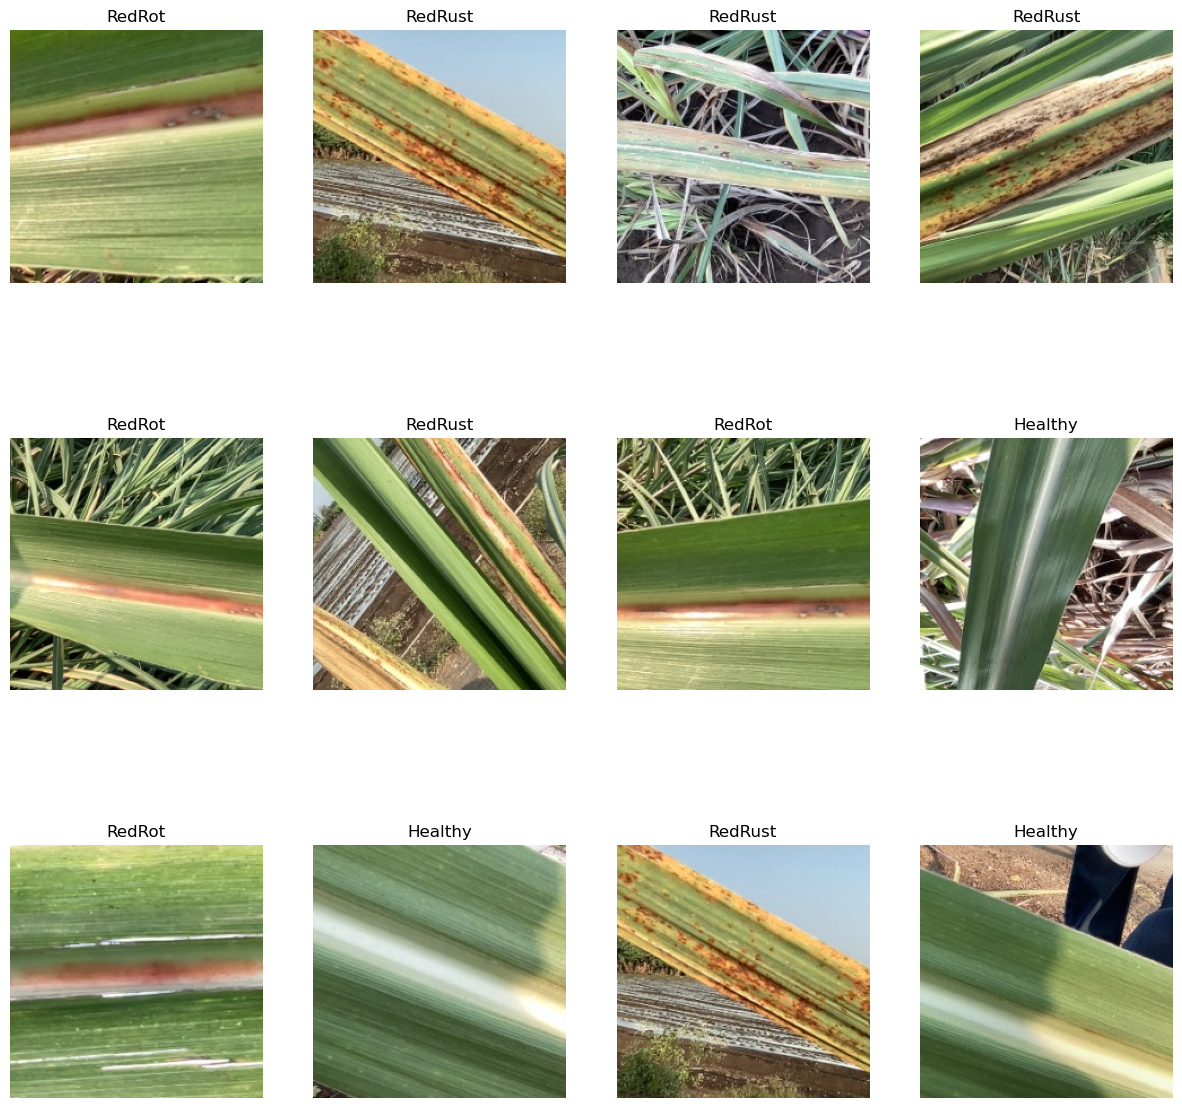

In [6]:

plt.figure(figsize=(15, 15))
for image, label in dataset.take(1): 
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_name[label[i]])  
        plt.axis("off")


# Function for splitting the data

In [8]:

def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=10)
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

# Split dataset into train, validation, and test sets

In [10]:

train_data, val_data, test_data = split_dataset(dataset)

# Caching, shuffling, and prefetching the data

In [12]:

train_ds = train_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

# Image Preprocessing: Rescaling and Resizing

In [14]:

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_Size, Image_Size),
    layers.Rescaling(1.0 / 255)
])

# Data Augmentation

In [16]:

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical"),
    layers.RandomRotation(factor=0.5)
])

# Creating the model

In [18]:

input_shape = (Image_Size, Image_Size, Channels)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    # Correct output layer for 3 classes
    layers.Dense(3, activation='softmax')
])

model.build(input_shape=(None, Image_Size, Image_Size, Channels))
model.save("C:/LEAF_Project/model.keras")
model.summary()

C:\Users\maham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 313,731 (1.20 MB)

 Trainable params: 313,731 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [20]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)

# Train the model

In [25]:
history = model.fit(
train_data, epochs =10 , batch_size = Batch_Size, verbose = 1)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 829ms/step - accuracy: 0.3396 - loss: 1.0970
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 846ms/step - accuracy: 0.3872 - loss: 1.0902
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 817ms/step - accuracy: 0.4298 - loss: 1.0762
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 798ms/step - accuracy: 0.5674 - loss: 0.9822
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 827ms/step - accuracy: 0.5810 - loss: 0.8524
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 812ms/step - accuracy: 0.6491 - loss: 0.8097
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 821ms/step - accuracy: 0.6755 - loss: 0.7257
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 822ms/step - accuracy: 0.7626 - loss: 0.6390
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 812ms/step - accuracy: 0.7357 - loss: 0.6292
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 824ms/step - accuracy: 0.7463 - loss: 0.6289


# Plotting predictions

First Image of batch to predict:
Actual label: RedRot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step
Predicted label: RedRot


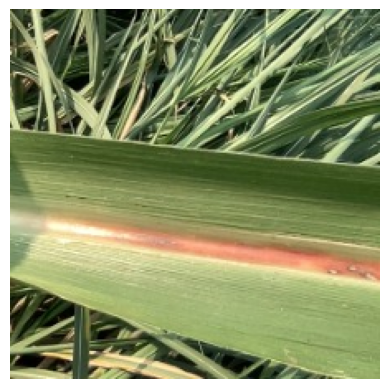

In [30]:
for batch_image, batch_label in train_ds.take(1):
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = class_name[batch_label[0]]
    
    print('First Image of batch to predict:')
    plt.imshow(first_image)
    print('Actual label:', first_label)
    
    batch_prediction = model.predict(batch_image)
    print('Predicted label:', class_name[np.argmax(batch_prediction[0])])
    plt.axis('off')


# Plot batch of images with actual and predicted labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


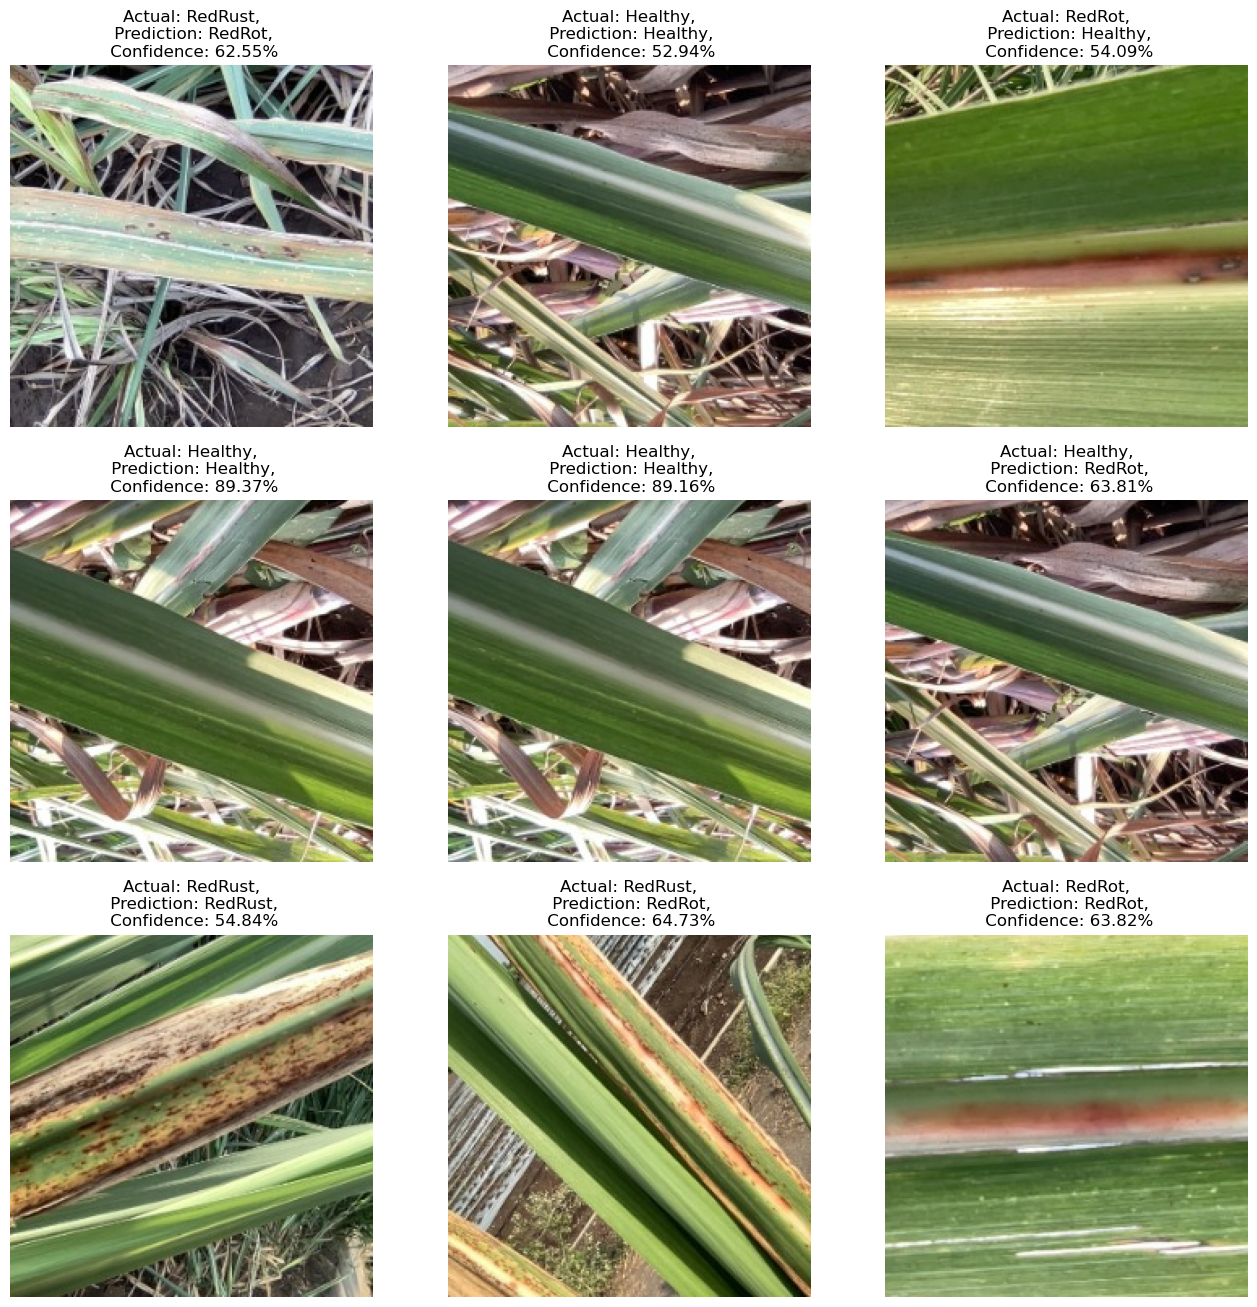

In [32]:
plt.figure(figsize=(16, 16))
for batch_image, batch_label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_name[batch_label[i]]
        
        plt.imshow(image)
        batch_prediction = model.predict(batch_image)
        predicted_class = class_name[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual: {label},\n Prediction: {predicted_class},\n Confidence: {confidence}%')
        plt.axis('off')